In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np

In [13]:
file = '/data/fast1/das4orcas_prelim/decimator_2024-10-25_23.44.00_UTC_006608.h5'

data = h5py.File(file)
attrs=dict(data['Acquisition'].attrs)
das = np.array(data['Acquisition/Raw[0]/RawData'])
time = np.array(data['Acquisition/Raw[0]/RawDataTime'])
data.close()
dt = 1/attrs['MaximumFrequency']/2
dx = attrs['SpatialSamplingInterval']
nt,nx = data_hf.shape

x = np.linspace(0,nx*dx,nx)
t = np.linspace(0,nt*dt,nt)

In [12]:
b,a = butter(2,10,'high',fs=1/dt)
data_hf = filtfilt(b,a,das,axis=0)

2000.0

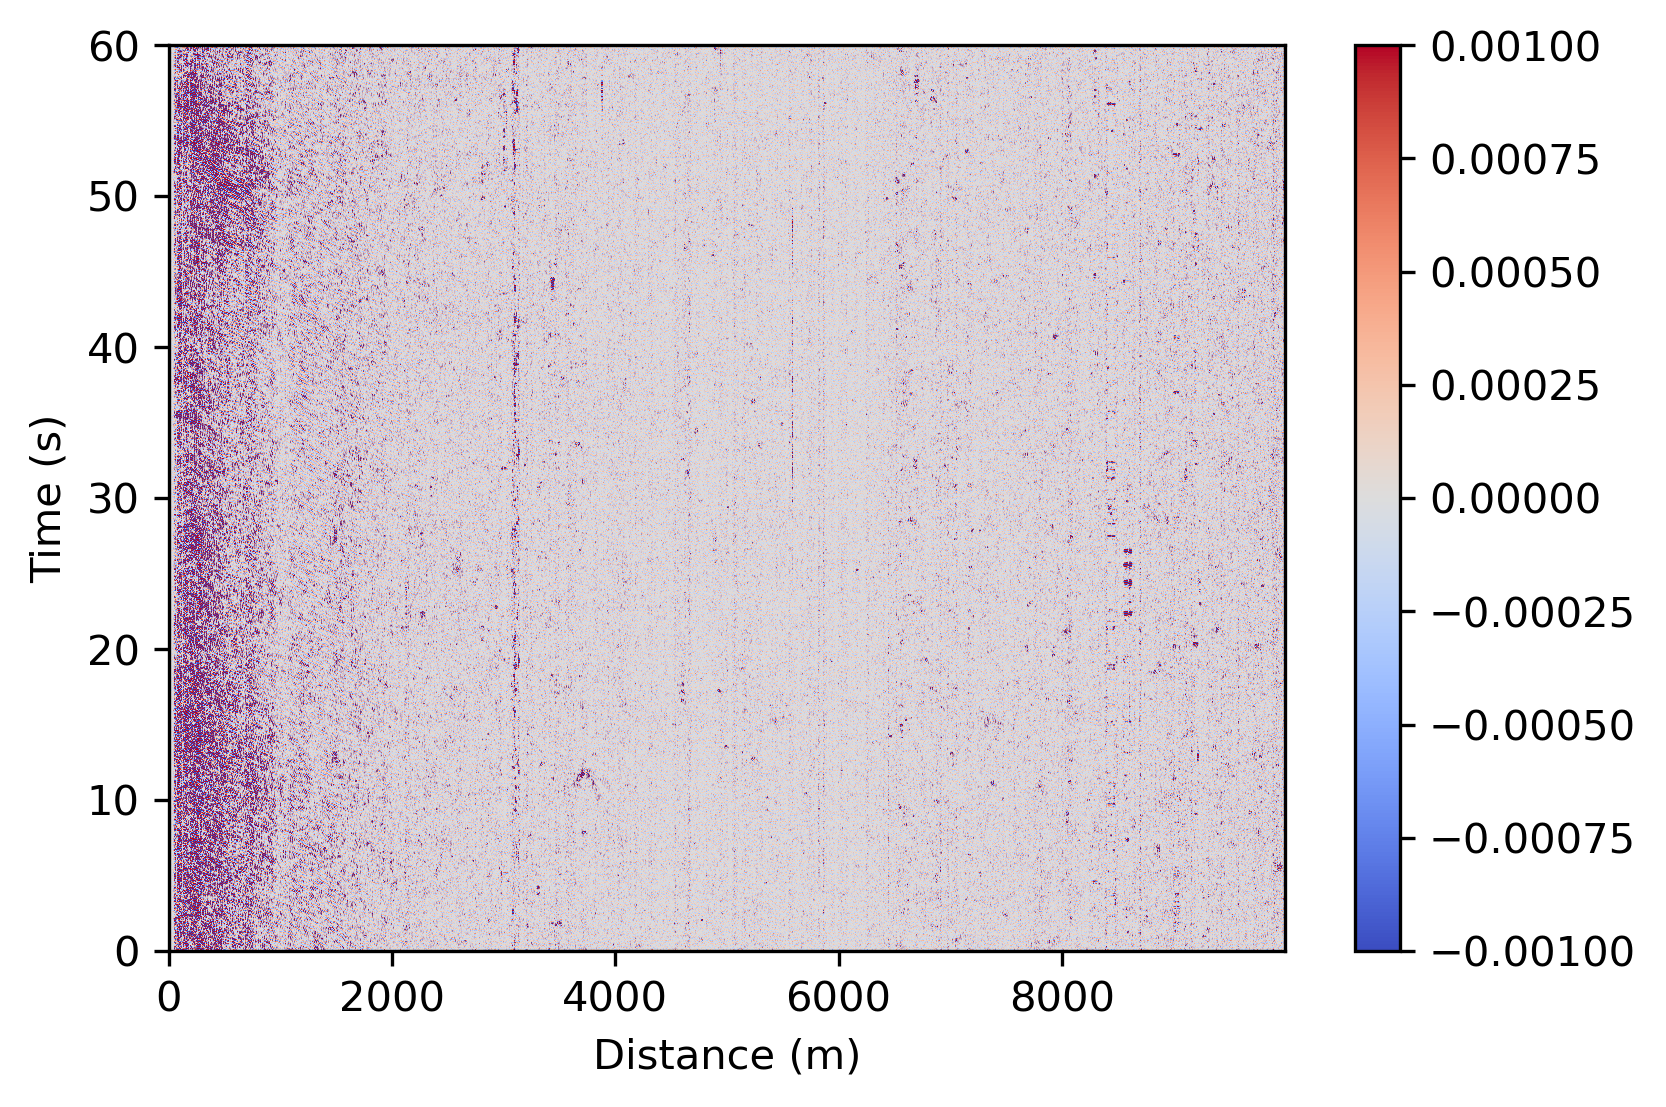

In [18]:
vm = 0.001
plt.subplots(dpi=300)
c=plt.imshow(data_hf,aspect='auto',cmap='coolwarm',
             vmin=-vm,vmax=vm,extent=[x[0],x[-1],t[0],t[-1]])
plt.colorbar(c)
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
# plt.savefig(file+'.png')
plt.show()